<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

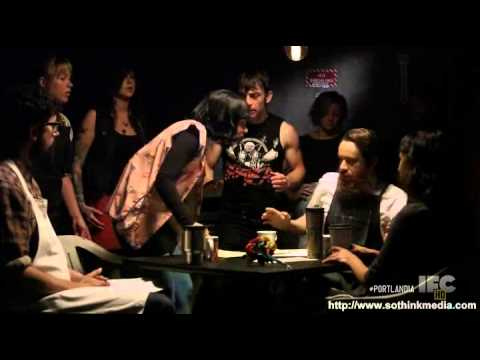

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Stephanie\\Documents\\DS9 Unit 4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
#value counts to see what the names look like
#shops['coffee_shop_name'].value_counts()

In [5]:
#lower case all letters

shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x: x.lower())
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops['star_rating'] = shops['star_rating'].apply(lambda x: x.lower())


In [6]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating


In [7]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: x.replace("star rating", ""))


In [8]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

In [9]:
shops['star_rating'].head()

0    5
1    4
2    4
3    2
4    4
Name: star_rating, dtype: int64

In [10]:
import re

def tokenize(text):
    """Parses a string into a list of semantic units (words)
    
    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [11]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [12]:
shops['tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [13]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [14]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [15]:
shops['good_rating'] = (shops['star_rating'] > 3).astype(int)
shops['bad_rating'] = (shops['star_rating'] <= 3).astype(int)

In [16]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,good_rating,bad_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in love love loved the atm...,5,"[11252016, 1, checkin, love, love, loved, the,...",1,0
1,the factory - cafe with a soul,"12/2/2016 listed in date night: austin, ambia...",4,"[1222016, listed, in, date, night, austin, amb...",1,0
2,the factory - cafe with a soul,11/30/2016 1 check-in listed in brunch spots ...,4,"[11302016, 1, checkin, listed, in, brunch, spo...",1,0
3,the factory - cafe with a soul,11/25/2016 very cool decor! good drinks nice ...,2,"[11252016, very, cool, decor, good, drinks, ni...",0,1
4,the factory - cafe with a soul,12/3/2016 1 check-in they are located within ...,4,"[1232016, 1, checkin, they, are, located, with...",1,0


In [17]:
def count(docs):
        #create counters
        word_counts = Counter()
        appears_in = Counter()
        #length of docs/x
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc)) #? (stating its in a set w/in doc?)
        #creates a temp dictionary with word counts
        temp = zip(word_counts.keys(), word_counts.values())
        #creates wc df with columns word, and count
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        #add column named rank, method=first
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()
        #create a function to do word/ total sum variable made above
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        #sort values by rank
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()
        # ^cum. sum of percent total, v create zip of appears_in Counter
        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [18]:
wc = count(shops['tokens'])

In [19]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,the,6847,34809,1.0,0.044537,0.044537,0.899028
2,and,6864,26650,2.0,0.034098,0.078634,0.901261
72,a,6246,22755,3.0,0.029114,0.107748,0.820116
41,i,5528,20237,4.0,0.025892,0.133641,0.725840
70,to,5653,17164,5.0,0.021961,0.155601,0.742253


## Can we visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [20]:
wc_good = count(shops[shops['good_rating'] == 1]['tokens'])
wc_bad = count(shops[shops['bad_rating'] == 1]['tokens'])

In [21]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,the,5479,26616,1.0,0.044245,0.044245,0.892345
2,and,5545,21311,2.0,0.035426,0.079670,0.903094
72,a,4983,17706,3.0,0.029433,0.109104,0.811564
41,i,4344,14952,4.0,0.024855,0.133959,0.707492
70,to,4452,12763,5.0,0.021216,0.155175,0.725081


In [22]:
wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,the,1368,8193,1.0,0.045513,0.045513,0.926829
0,and,1319,5339,2.0,0.029659,0.075172,0.893631
215,i,1184,5285,3.0,0.029359,0.104530,0.802168
58,a,1263,5049,4.0,0.028048,0.132578,0.855691
135,to,1201,4401,5.0,0.024448,0.157026,0.813686


In [23]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,the,6847,34809,1.0,0.044537,0.044537,0.899028
2,and,6864,26650,2.0,0.034098,0.078634,0.901261
72,a,6246,22755,3.0,0.029114,0.107748,0.820116
41,i,5528,20237,4.0,0.025892,0.133641,0.725840
70,to,5653,17164,5.0,0.021961,0.155601,0.742253


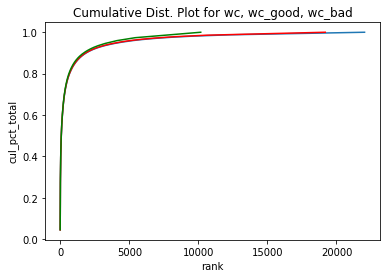

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);
sns.lineplot(x='rank', y='cul_pct_total', data=wc_good, color='red');
sns.lineplot(x='rank', y='cul_pct_total', data=wc_bad, color='green');
plt.title("Cumulative Dist. Plot for wc, wc_good, wc_bad");
plt.show()

The cumulative distribution plot shows an elbow shape, meaning the vast majority of impact is within a smaller percentile of the data. The sharpness of the bend tells us there is a particularly smaller ratio towards the top. Checking the percentage of the top 10 ranked words, they make up roughly 22% of the tokens created. Upping it to 20 to get a better idea of some words that might me more irrelevant in context.

In [25]:
wc[wc['rank'] <= 10]['cul_pct_total'].max()

0.22495429136583414

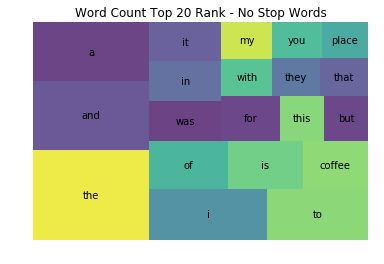

In [26]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title("Word Count Top 20 Rank - No Stop Words")
plt.show()

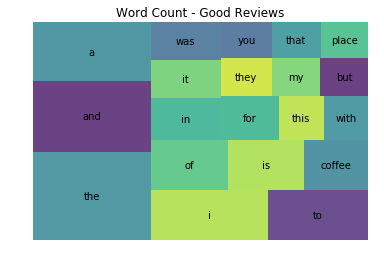

In [27]:
wc_good_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Word Count - Good Reviews')
plt.show()

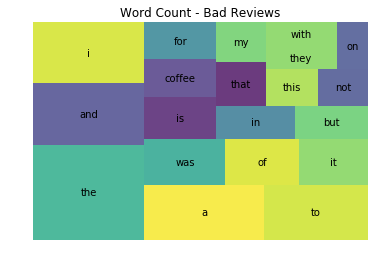

In [28]:
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Word Count - Bad Reviews')
plt.show()

I'm not finding a lot with just 10 words, so I upped the visualization to 20 to get rid of a bunch of blank box spaces. Next step: Introduce the tokenizer and create stop words. 

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
tokens = []

""" Make them tokens, awww yisssss """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
    

shops['tokens'] = tokens

In [ ]:
shops['tokens'].head()

In [ ]:
wc = count(shops['tokens'])

In [ ]:
wc.head()

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Word Count for Top 20 Ranked Tokens')
plt.show()

In [ ]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = [] #empty list
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [ ]:
wc = count(shops['tokens'])

In [ ]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Obviously, a lot of these words still need to be tidied up! Creating a stop word variable to store a list of words to add to the NLP default, then we'll run it on the word count, good and bad, and do more visualizations. 

In [ ]:
print(type(nlp.Defaults.stop_words))

In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union(['i','I', "i've", "1", "i'm",' ', '-', "coffee", "coffee.", 'it', "it's", 'it.', 'the', 'this','place', 'like', 'try', 'came', "don't", "come", 'didnt', "didn't", 'just', 'got'])

In [ ]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [ ]:
wc = count(shops['tokens'])
wc_good = count(shops[shops['good_rating'] == 1]['tokens'])
wc_bad = count(shops[shops['bad_rating'] == 1]['tokens'])
wc.head(20)

In [ ]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Word Count Top 20 w/ Stop Words')
plt.show()

In [ ]:
wc_good_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Good Review Word Count w/ Stop Words')
plt.show()

In [ ]:
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Bad Review Word Count w/ Stop Words')
plt.show()

I found it interesting that the Good Reviews and Bad Reviews had such a similarity in terminology. Additionally, I could continue working over the data, removing other words of little interest to our analysis, to continue to understand what words define the bad reviews and what trends we can reveal. 

Currently, the Good Reviews (Reviews with a 4 or 5 star rating) showcase specific keywords, like `tea`, `iced`, `latte`, and `austin`. The more specific the terminology, the more likely the verbiage is to be in the good last. In the Bad Reviews (Reviews with a 1-3 star rating) ther terminology was more focused on an experience. Specifics mattered less (like `drink` instead of `tea` or `latte`) but terms like `service` and `asked` become more relevant. When giving a bad review, reviewers tend to relay human experiences. When giving a good review, reviewers tended towards specifics about location and shop offerings. 

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

